<a href="https://colab.research.google.com/github/reemap22/Project-2-DataCleaning-and-Analysis-Python/blob/main/Copy_f_of_Group_3_Eniac_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#`Eniac's Case`
 1. The Marketing Team Lead is convinced that offering discounts is beneficial in the long run. She believes discounts improve customer acquisition, satisfaction and retention, and allow the company to grow.

2. The main investors in the Board are worried about offering aggressive discounts. They have pointed out how the company’s recent quarterly results showed an increase in orders placed, but a decrease in the total revenue. They prefer that the company positions itself in the quality segment, rather than competing to offer the lowest prices in the market.


#Group work on Eniac´s data cleaning


In [ ]:
#import pandas as pd

#url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=sharing"
#path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
#products_df = pd.read_csv(path)

#url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=sharing"
#path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
#orders_df = pd.read_csv(path)

#url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing"
#path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
#orderlines_df = pd.read_csv(path)

# brands_cl.csv
#url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
#path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
#brands_df = pd.read_csv(path)

In [ ]:
import pandas as pd

In [ ]:
url = "https://drive.google.com/file/d/1tsCP3YUGmxp3i0I5lRs7_8XDMYWTd4HJ/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

url = "https://drive.google.com/file/d/1PtPPww7U-gxm_JolJsU23Z9WBa_oBvaZ/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

url = "https://drive.google.com/file/d/1HJaRmWsQL4aeU6umdedPpUj__mWV_5kQ/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

url = "https://drive.google.com/file/d/1228LW6cfSlNFVTlLqH4CzO71dJKi8iqu/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id=" + url.split("/")[-2]
brands = pd.read_csv(path)

Information on the Tables

In [ ]:
#products
#orders
#orderlines
#brands

#product.shape
#orders.shape
#orderlines.shape
#brands.shape

#products.info
#orders.info
#orderlines.info
#brands.info

## `products`

In this table we changed the data type of price and promo_price and removed corrupted information


### Look for duplicates




In [ ]:
# Finding the duplicates values in the products DataFrame with the `.duplicated´ method
duplicates = products.duplicated()
("Number of duplicated rows:", duplicates.sum())

('Number of duplicated rows:', 8746)

In [ ]:
products.drop_duplicates(inplace=True)

In [ ]:
products.duplicated().sum()

0

###Looking for missing values




In [ ]:
products.isnull().sum() # To find the total amount of missing values on products.


sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

In [ ]:
products.isnull().sum() / len(products) * 100 # To show the percentage rrepresented by this missing values


sku            0.000000
name           0.000000
desc           0.066163
price          0.434783
promo_price    0.000000
in_stock       0.000000
type           0.472590
dtype: float64

### Checking & Changing datatypes




`price`

In [ ]:
products["price"] = pd.to_numeric(products["price"])

As we tried to change the datatype of prices we identified many numers with two decimal spaces.





In [ ]:
#Here, we search for how many values in prices are in total under this condtion.
products['price'].astype(str).str.contains("\d+\.\d+\.\d+").value_counts()

False    10580
Name: price, dtype: int64

In [ ]:
products['price'].astype(str).str.contains(r"\d+\.\d+\.\d+").value_counts(normalize=True) * 100

False    96.436673
True      3.563327
Name: price, dtype: float64

In [ ]:
#Here we decided to coerce the errors given on the convertion of prices into NaN values for the sake of the project
products['price'] = pd.to_numeric (products['price'], errors='coerce')

`promo_price`




In [ ]:
#Here we change promo_prices into "Float" Datatype
products['promo_price'] = products'promo_price'].astype(float)


SyntaxError: ignored

In [ ]:
products['promo_price'].astype(str).str.contains(r"\d+\.\d+\.\d+").value_counts(normalize=True) * 100

False    56.550095
True     43.449905
Name: promo_price, dtype: float64

Here we asume there is corrupted data in promo_prices so we star looking for values afected by the decimal problem

In [ ]:
promo_problems_number = products.loc[(products.promo_price.astype(str).str.contains("\d+\.\d+\.\d+"))|(products.promo_price.astype(str).str.contains("\d+\.\d{3,}")), :].shape[0]
print(f"The column promo_price has in total {promo_problems_number} wrong values. This is {round(((promo_problems_number / products.shape[0]) * 100), 2)}% of the rows of the DataFrame")

The column promo_price has in total 9734 wrong values. This is 92.0% of the rows of the DataFrame


In [ ]:
# Here we open the table under the condition of the error to reassure the last output is accurate
promo_price = products.loc[(products.promo_price.astype(str).str.contains("\d+\.\d+\.\d+"))|(products.promo_price.astype(str).str.contains("\d+\.\d{3,}")), :]
promo_price.sample(50)

,sku,name,desc,price,promo_price,in_stock,type
1441,LAC0146,LaCie d2 USB 3.0 Hard Disk 4TB,External Hard Disk 1 bay for Mac and PC.,199.00,1.579.945,0,11935397
15381,REP0340,LCD screen repair iPad 4,Repair service including parts and labor for i...,NaN,1.299.903,0,"1,44E+11"
1031,PAC0434,OWC Mercury Elite Pro + 2TB,External connection box with eSata / FW800 / U...,210.98,1.645.842,1,11935397
2331,SNN0046,Sonnet SuperSpeed ​​USB 3.0 ExpressCard / 34,SuperSpeed ​​USB 3.0 PCI adapter ExpressCard /...,74.90,74.899,0,1276
11458,MRL0008,Brown Marley Chant Mini Wireless Speaker,Bluetooth small with protective canvas for iPh...,59.99,459.897,0,5398
369,REP0036,Full screen repair iPhone 4,Repair service including parts and labor for i...,49.99,499.899,0,"1,44E+11"
445,NTE0027,NewerTech Mini DVI to DVI Adapter,Adapter mini DVI to DVI.,18.99,109.904,0,1325
15247,WAC0167-A,Open - Wacom Intuos Creative Art Pen & Touch M...,Graphic tablet with pen and touch digital tool...,199.99,1.357.747,0,1298
17208,WDT0384,WD My Passport 1TB SSD Drive SSD external USB-C,1TB SSD external drive with USB-C connection f...,399.99,3.867.934,1,11935397
18922,LIF0114-A,Open - LifeProof nüüd Submersible iPhone Case ...,submersible and resistant to extreme condition...,89.99,42.729,1,11865403


In [ ]:
# As 93% of the data seems untrustworthy, and deleting so many rows will leave us without products, we delete this column.
products_cl = products.drop(columns=["promo_price"])

##`Orders`




###Checking for duplicated values

In [ ]:
# orders
orders.duplicated().sum()

0

###Checking for missing values





In [ ]:
orders.isnull().sum() # To find the total amount of missing values on products.


order_id        0
created_date    0
total_paid      5
state           0
dtype: int64

In [ ]:
orders.isnull().sum() / len(orders) * 100 # To show the percentage rrepresented by this missing values


order_id        0.000000
created_date    0.000000
total_paid      0.002204
state           0.000000
dtype: float64

As there is such a tiny amount of missing values, we will simply delete these rows, as we have enough data without them.

In [ ]:
orders = orders.loc[~orders.total_paid.isna(), :]

###Changing datatypes



##`Orderlines`
 @Filled need to doble check

### Duplicated Values

In [ ]:
orderlines.duplicated().sum()

0

###Checking for missing values

In [ ]:
orderlines.isnull().sum() # To find the total amount of missing values on products.


In [ ]:
orderlines.isnull().sum() / len(orderlines) * 100 # To show the percentage rrepresented by this missing values


id                  0.0
id_order            0.0
product_id          0.0
product_quantity    0.0
sku                 0.0
unit_price          0.0
date                0.0
dtype: float64

###Changing Datatype

`Date` Into DateType

In [ ]:
orderlines.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()

False    257814
True      36169
Name: unit_price, dtype: int64

In [ ]:
orderlines["date"] = pd.to_datetime(orderlines["date"])

`unit_price` to numeric

In [ ]:
orderlines["unit_price"] = pd.to_numeric(orderlines["unit_price"])
# ValueError: Unable to parse string "1.137.99" at position 6

ValueError: ignored

# Data quality work




Here we load our clean datasets.

In [ ]:
import pandas as pd

def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"

# Google Drive file ids
file_ids = {
    "brands": "14_RkEUuhf9-otJqbVITDTvus45zR8LJp",
    "orderlines": "18Tzi4SxwYsijRdhvUQUGSdi0A2WzlzA9",
    "orders": "14HwyeNbaWy8IZ9BkwbDSxfDURHUtJzJ7",
    "products": "1fQVI9IhFcDFMCEl5AQzJNKcEFMnYyLuA",
}

# Read data from Google Drive
brands_cl = pd.read_csv(gd_path(file_ids["brands"]), sep=",")
orderlines_cl = pd.read_csv(gd_path(file_ids["orderlines"]), sep=",", parse_dates=["date"])
orders_cl = pd.read_csv(gd_path(file_ids["orders"]), sep=",", parse_dates=["created_date"])
products_cl = pd.read_csv(gd_path(file_ids["products"]), sep=",")

Now we  generate copies of the clean sets, and rename them into "df" for us to work on them.

In [ ]:
brands_df = brands_cl.copy()
orderlines_df = orderlines_cl.copy()
orders_df = orders_cl.copy()
products_df = products_cl.copy()

Here we set pandas Data frame size for us to work the on data quality next.

In [ ]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)

## Excluding unwanted orders

In [ ]:
orders_df["state"].unique()

array(['Cancelled', 'Completed', 'Pending', 'Shopping Basket',
       'Place Order'], dtype=object)

Now we focus only the "completed" orders and want to save them as a variable.

In [ ]:
orders_comp_df = orders_df.loc[orders_df["state"].isin(["Completed"])]

and we make a this variable a list.

In [ ]:
orders_comp_list = list(orders_comp_df["order_id"])

Here we give the table orders and orderlines the "qu" ending to refer the format we made.

In [ ]:
orders_qu = orders_df.loc[orders_cl["order_id"].isin(orders_comp_list), :].copy()

In [ ]:
orderlines_qu = orderlines_df.loc[orderlines_cl["id_order"].isin(orders_comp_list), :].copy()

In [ ]:
#orders_qu.info()
#orderlines_qu.info()

### Excluding orders with unknown products


Looks like the vast majority of products are known.

We can't simply delete the rows containing unknown products. We need to remove the entirety of any order that contains an unknown product.

The 1st step is to identify any order that contains an unknown product. Then find the order_id of these orders. Finally filter these order numbers out of our _qu DataFrames.

In [ ]:
known_sku_list = products_cl["sku"].tolist()

In [ ]:
orderlines_qu.sku.isin(known_sku_list).value_counts()

True     55320
False     1394
Name: sku, dtype: int64

In [ ]:
unknown_orders = orderlines_qu[~orderlines_qu["sku"].isin(known_sku_list)]["id_order"].tolist()

orders_qu = orders_qu[~orders_qu["order_id"].isin(unknown_orders)].copy()
orderlines_qu = orderlines_qu[~orderlines_qu["id_order"].isin(unknown_orders)].copy()

len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())
# Output: (41701, 41701)


(45242, 41701)

### Only keep orders that are present in both `orders` and `orderlines`

In [ ]:
# Inner merge of orderlines_qu and orders_qu
orders_orderlines_qu_merged = orders_qu.merge(
    orderlines_qu,
    how="inner",
    left_on="order_id",
    right_on="id_order"
)

# Create a list of the matching order_ids
order_ids_in_both_list = orders_orderlines_qu_merged["order_id"].unique().tolist()

# Update `orderlines_qu` in accordance with the list above
orderlines_qu = orderlines_qu[orderlines_qu["id_order"].isin(order_ids_in_both_list)].copy()

# Update `orders_qu` in accordance with the list above
orders_qu = orders_qu[orders_qu["order_id"].isin(order_ids_in_both_list)].copy()

# Check the lengths of unique order_ids in both DataFrames
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())
# The output should be (43064, 43064)

(41701, 41701)

## Exploring the revenue from different tables.

In [ ]:
orderlines_qu_copy = orderlines_qu.copy()
#orderlines_qu.info()

In [ ]:
#Create the unit_price_total as orderlines.unit_price * orderlines.product_quantity
orderlines_qu_copy["unit_price_total"] = orderlines_qu_copy["unit_price"] * orderlines_qu_copy["product_quantity"]

In [ ]:
#Group by order_id, summarising by the sum of unit_price_total
orderlines_qu_group_order_df = orderlines_qu_copy.groupby("id_order", as_index=False)["unit_price_total"].sum()
orderlines_qu_group_order_df

,id_order,unit_price_total
0,241423,129.16
1,242832,10.77
2,243330,77.99
3,245275,149.00
4,245595,105.98
...,...,...
41696,527042,13.99
41697,527070,19.98
41698,527074,19.98
41699,527096,29.97


## What is the average difference between `total_paid` and `unit_price_total`?

In [ ]:
orders_qu_copy = orders_qu.copy()
diff_df = orders_qu_copy
#Let's merge our grouped orderlines table with the orders table, so we can calculate the differences in prices.
# inner merge of orderlines_qu and orders_qu
diff_df = orders_qu_copy.merge(
    orderlines_qu_group_order_df,
    left_on="order_id",
    right_on="id_order" )

In [ ]:
diff_df["difference"] = diff_df["total_paid"] - diff_df["unit_price_total"]

In [ ]:
#diff_df.head()

## What is the distribution of these differences?

In [ ]:
mean_difference = diff_df["difference"].mean().round(2)



## Can all the differences be explained by shipping costs? If not, what are other plausible explanations? / rewrite /

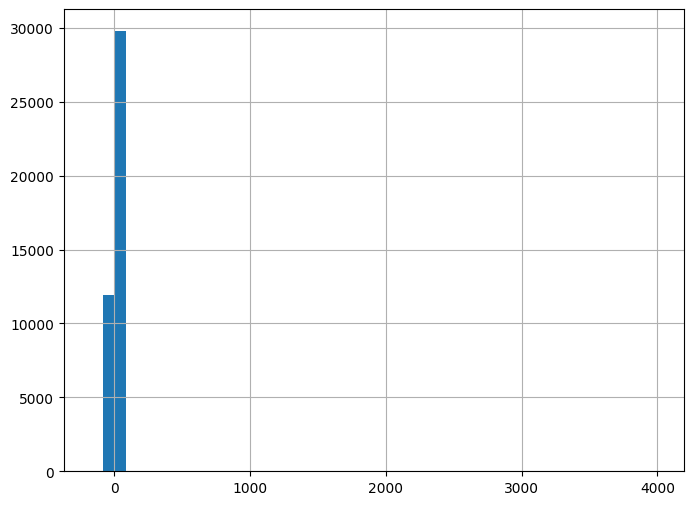

In [ ]:
diff_df["difference"].hist(bins= 50, figsize=(8,6));

In [ ]:
diff_df["difference"].describe()

count   41701.00
mean        4.47
std        26.05
min      -165.00
25%         0.00
50%         4.99
75%         6.99
max      3984.99
Name: difference, dtype: float64

In [ ]:
diff_df.sort_values("difference", ascending=False)
# some differences can be seen as shipping costs but others habe a huge difference. Both very high or very low

,order_id,created_date,total_paid,state,id_order,unit_price_total,difference
97,297148,2017-01-01 16:42:24,4069.54,Completed,297148,84.55,3984.99
81,293308,2017-01-01 13:33:43,2635.47,Completed,293308,66.49,2568.98
39153,512894,2018-02-16 13:25:30,3356.18,Completed,512894,1674.60,1681.58
38255,508825,2018-02-16 11:21:44,2590.18,Completed,508825,1291.60,1298.58
39248,513447,2018-02-17 19:26:59,486.89,Completed,513447,94.98,391.91
...,...,...,...,...,...,...,...
3761,314570,2017-01-25 09:01:35,122.99,Completed,314570,164.90,-41.91
318,300474,2017-01-02 12:24:54,119.00,Completed,300474,164.90,-45.90
5075,319901,2017-02-04 16:09:34,60.43,Completed,319901,142.44,-82.01
74,289685,2017-01-09 23:15:07,15.95,Completed,289685,135.97,-120.02


## If there are differences that you can’t explain: what should you do with these orders?

In [ ]:
# calculate the quartiles
Q1 = diff_df["difference"].quantile(0.25)
Q3 = diff_df["difference"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
diff_no_outliers_df = diff_df.loc[(diff_df["difference"] >= (Q1 - 1.5*IQR)) & (diff_df["difference"] <= (Q3 + 1.5*IQR)), :]

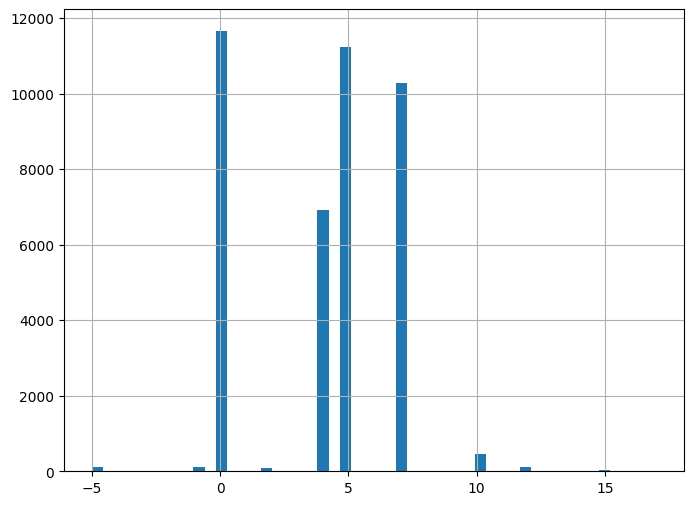

In [ ]:
diff_no_outliers_df.difference.hist(bins= 50, figsize=(8,6));
# the outliers are delted and the distribution is closer together

In [ ]:
normal_diff_list = list(diff_no_outliers_df["order_id"])
# the orders I just deleted also need to be deleted in the other tables. This will create a list with all ids that are left (without outliers)

In [ ]:
orders_df = orders_df.loc[orders_df["order_id"].isin(normal_diff_list), :]
orderlines_df = orderlines_cl.loc[orderlines_cl["id_order"].isin(normal_diff_list), :]
# these lines will compare in both tables the Ids that are in the normal_diff_list and the table and will only keep the matching ones.

In [ ]:
len(list(orders_qu["order_id"].unique())), len(list(orderlines_qu["id_order"].unique()))
# both tables have the same amount of order_ids

(41701, 41701)

## Become confident about your dataset

Let's hear your thoughts about what you discovered.

In [ ]:
# your thoughts & code here

In [ ]:
#products
#orders
#orderlines
#brands

#product.shape
#orders.shape
#orderlines.shape
#brands.shape

#products.info
#orders.info
#orderlines.info
#brands.info

Downloading our quality controlled DataFrames

In [ ]:
from google.colab import files

orders_qu.to_csv("orders_qu.csv", index=False)
files.download("orders_qu.csv")

orderlines_qu.to_csv("orderlines_qu.csv", index=False)
files.download("orderlines_qu.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


# Importing quality checked data & Creating new DataFrames

In [ ]:
import pandas as pd

def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"

# Google Drive file ids
file_ids = {
    "brands": "1228LW6cfSlNFVTlLqH4CzO71dJKi8iqu",
    "orderlines": "1HJaRmWsQL4aeU6umdedPpUj__mWV_5kQ",
    "orders": "1PtPPww7U-gxm_JolJsU23Z9WBa_oBvaZ",
    "products": "1tsCP3YUGmxp3i0I5lRs7_8XDMYWTd4HJ",
}

# Read data from Google Drive
brands_qu = pd.read_csv(gd_path(file_ids["brands"]), sep=",")
orderlines_qu = pd.read_csv(gd_path(file_ids["orderlines"]), sep=",", parse_dates=["date"])
orders_qu = pd.read_csv(gd_path(file_ids["orders"]), sep=",", parse_dates=["created_date"])
products_qu = pd.read_csv(gd_path(file_ids["products"]), sep=",")

Next we will creat copies of this quality checked datasets, to star to our analysis.

In [ ]:
brands_df = brands_qu.copy()
orderlines_df = orderlines_qu.copy()
orders_df = orders_qu.copy()
products_df = products_qu.copy()

What is the time period that the dataset covers?

In [ ]:
#What is the time period the dataset covers?

# Find the minimum and maximum dates in the dataset
start_date = orders_df['created_date'].min()
end_date = orders_df['created_date'].max()

# Print the time period covered by the dataset
print("Time period covered by the dataset:")
print("Start date:", start_date)
print("End date:", end_date)

Time period covered by the dataset:
Start date: 2017-01-01 00:07:19
End date: 2018-03-14 13:58:36


##What is the overall revenue for that time?

In [ ]:
start_date = orders_df['created_date'].min()
end_date = orders_df['created_date'].max()

# Filter the 'orders_df' based on the time period covered by the dataset
filtered_orders = orders_df[(orders_df['created_date'] >= start_date) & (orders_df['created_date'] <= end_date)]

# Calculate and print the overall revenue
overall_revenue = filtered_orders['total_paid'].sum()
print(f"Overall revenue for the time period: {overall_revenue}")


Overall revenue for the time period: 129159615.07


## Are there seasonal patterns in the evolution of sales?

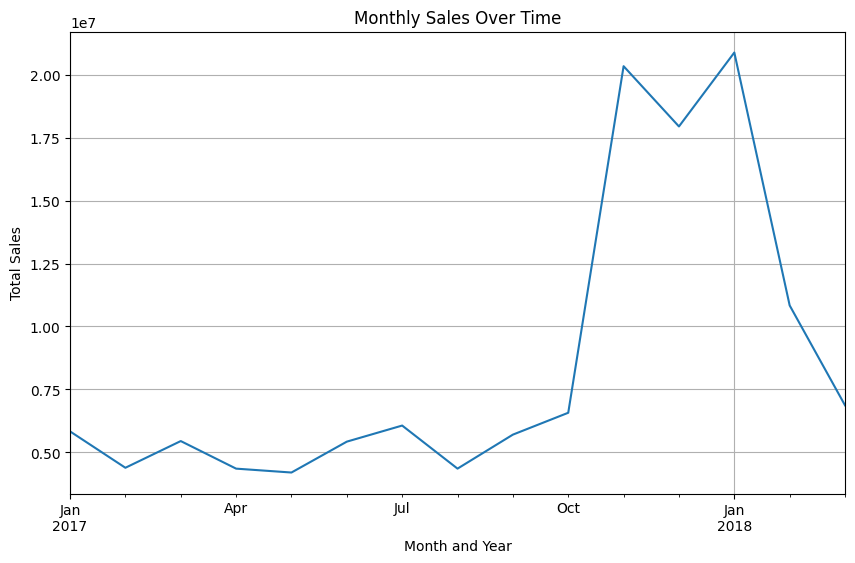

In [ ]:
import matplotlib.pyplot as plt

# Grouping the data by month and calculate the total sales for each month
monthly_sales = orders_df.resample('M', on='created_date')['total_paid'].sum()

# Ploting the monthly sales
monthly_sales.plot(figsize=(10, 6), grid=True)
plt.xlabel('Month and Year')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Over Time')
plt.show()

##  What are the most sold products?

In [ ]:
# Merging tables and grouping the data by product name to calculate the total quantity sold
merged_df = pd.merge(orderlines_cl, products_cl, on='sku')
product_sales = merged_df.groupby('name')['product_quantity'].sum()

# Finding and print the top sold products
top_sold_products = product_sales.nlargest(10)
("Top sold products:\n", top_sold_products)


NameError: ignored

## What are the products that generate the most revenue?

In [ ]:
# Merging tables and grouping the data by product name to calculate the total revenue for each product
merged_order_orderlines_df = pd.merge(orders_cl, orderlines_cl, left_on='order_id', right_on='id_order', how='inner')
merged_product_df = pd.merge(merged_order_orderlines_df, products_cl, on='sku')
product_revenue = merged_product_df.groupby('name')['total_paid'].sum()

# Printing the top revenue-generating products
top_revenue_products = product_revenue.nlargest(10)
print("Products generating the most revenue:\n", top_revenue_products)

#  <u>Analizing Discounts</u>

##Does revenue grows when discounts increases?

* *The Marketing Team Lead is convinced that offering discounts is beneficial in the long run. She believes discounts improve customer acquisition, satisfaction and retention, and allow the company to grow.*
* *The main investors in the Board are worried about offering aggressive discounts. They have pointed out how the company’s recent quarterly results showed an increase in orders placed, but a decrease in the total revenue. They prefer that the company positions itself in the quality segment, rather than competing to offer the lowest prices in the market.*

In [ ]:
ol = orderlines_df
p = products_df
p_ol = ol.merge(
    p,
    how="left",
    left_on="sku",
    right_on="sku"
)

o = orders_df
p_ol_o = p_ol.merge(
    o,
    how="left",
    left_on="id_order",
    right_on="order_id"
)

`p_ol_o` is the merger of the datasets `products_df`, `orderlines_df` and `orders_df`.

Just an overview of the discounts:

In [ ]:
p_ol_o["discount"] = p_ol_o["price"] - p_ol_o["unit_price"]
p_ol_o[["sku", "name", "unit_price", "price", "discount", "date"]]

Discount and time dimension:

In [ ]:
sorted_discounts = p_ol_o.sort_values(by='discount', ascending=False)
sorted_discounts[["sku", "name", "unit_price", "price", "discount", "date"]]

line chart with two lines (one the sales, and the other one the sum / count of discounts)

In [ ]:
daily_sales = p_ol_o.groupby(p_ol_o['date'].dt.date)['price'].sum()
daily_discounts = p_ol_o.groupby(p_ol_o['date'].dt.date)['discount'].count()

In [ ]:
daily_data = pd.concat([daily_sales, daily_discounts], axis=1).reset_index()
daily_data.columns = ['date', 'sales', 'discount_count']

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(daily_data['date'], daily_data['sales'], label='Sales')
plt.plot(daily_data['date'], daily_data['discount_count'], label='Discount Count')

plt.xlabel('Date')
plt.ylabel('Sales & Discount Count')
plt.title('Sales and Discounts Over Time')
plt.legend()
plt.grid(True)
plt.show()

# <u>Business Questions</u>



###How should products be classified into different categories to simplify reports and analysis?

###What is the distribution of product prices across different categories?


###How many products are being discounted?

###How big are the offered discounts as a percentage of the product prices?

###How do seasonality and special dates (Christmas, Black Friday) affect sales?

###How could data collection be improved?